## Import delle librerie e dati da Drive

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras.layers.advanced_activations import LeakyReLU, PReLU
from keras import callbacks
import numpy as np
from keras.utils import to_categorical
from sklearn.metrics import classification_report

%matplotlib inline

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pickle 
x_train = pickle.load(open("/content/drive/My Drive/Colab Notebooks/Assignment 2/Dati/x_train.obj","rb"))
x_test = pickle.load(open("/content/drive/My Drive/Colab Notebooks/Assignment 2/Dati/x_test.obj","rb"))
y_train = pickle.load(open("/content/drive/My Drive/Colab Notebooks/Assignment 2/Dati/y_train.obj","rb"))

Visualizzazione immagini del Dataset

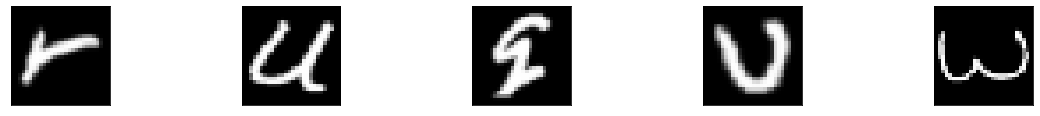

In [4]:
n = 5
plt.figure(figsize=(20, 4))
for i in range(n):
    # original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Preprocessing

In [0]:
x_train = x_train/255
x_test = x_test/255
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test= x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

## Split dei dati di x_train in Train e Test (80-20)

In [6]:
x_train.shape

(14000, 784)

In [7]:
dati = pd.DataFrame(data = x_train)
dati.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
dati["y"] = y_train

In [9]:
dati.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23


Effettuo una separazione dei valori di dati in 80% per train e 20% test, l'80% viene utilizzato per poter trainare un modello e ottimizzare i parametri (tramite validation), il restante 20% viene utilizzato per validare il modello nell'interezza con osservazioni mai viste prima

In [10]:
len(dati)*0.8

11200.0

In [0]:
train = dati.iloc[:11199]
test = dati.iloc[11200:]
train = train.reset_index()
test = test.reset_index()

Trasformo l'input come richiesto dalla rete neurale

In [0]:
X_train, y_train = train.iloc[:, :785], train.iloc[:, -1]
X_train = X_train.drop(columns="index")

X_test, y_test = test.iloc[:, :785], test.iloc[:, -1]
X_test = X_test.drop(columns="index")

In [13]:
X_train.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
y_train.head(2)

0    18
1    21
Name: y, dtype: uint8

In [15]:
X_test.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011765,0.007843,...,0.000000,0.000000,0.0,0.007843,0.015686,0.015686,0.007843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.011765,0.007843,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
y_test.head(2)

0    24
1    22
Name: y, dtype: uint8

In [17]:
len(y_test)

2800

Rimuovo dai valori delle lettere espresse in posizione numerica 16, facendo partire i valori da 0 (per la lettera P); <br>Successivamente applico una codifica ohe-hot alla variabile target

In [0]:
y_train = y_train - 16
y_train = to_categorical(y_train)
y_test = y_test - 16
y_test = to_categorical(y_test)

In [19]:
y_train[0]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [20]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

Trasformo l'input come richiesto dalla rete neurale

In [21]:
X_train = X_train.as_matrix()
y_train = y_train.reshape(11199,11)

X_test = X_test.as_matrix()
y_test = y_test.reshape(2800,11)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


# Parte Uno: Classificazione con una Rete Neurale

Effettuo il training della rete sull'80% dei dati, successivamente effettuo una evalutate sul test

Definisco le metriche necessarie per valutare il modello

In [0]:
from keras import backend as K
def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


In [0]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import SGD

In [0]:
ncol = X_train.shape[1]

classitarget = 11

model = Sequential()
model.add(Dense(64, input_shape=(ncol,)))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(classitarget, activation='softmax'))

In [25]:
classitarget = 11

model = Sequential()
model.add(Dense(128, input_shape=(ncol,)))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(classitarget, activation='softmax'))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Introduco Early Stop

In [0]:
stop = callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience = 6)

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 11)               

In [28]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', f1_m])

In [29]:
history = model.fit(X_train, y_train, epochs=100, validation_split = 0.25, batch_size=64, verbose=True, callbacks = [stop])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 8399 samples, validate on 2800 samples
Epoch 1/100





8399/8399 [==============================] - 6s 677us/step - loss: 1.5758 - acc: 0.4682 - f1_m: 0.3480 - val_loss: 0.8358 - val_acc: 0.7443 - val_f1_m: 0.7217
Epoch 2/100
8399/8399 [==============================] - 1s 123us/step - loss: 0.9941 - acc: 0.6785 - f1_m: 0.6492 - val_loss: 0.6913 - val_acc: 0.7829 - val_f1_m: 0.7807
Epoch 3/100
8399/8399 [==============================] - 1s 122us/step - loss: 0.8835 - acc: 0.7195 - f1_m: 0.7023 - val_loss: 0.6336 - val_acc: 0.8111 - val_f1_m: 0.8052
Epoch 4/100
8399/8399 [==============================] - 1s 130us/step - loss: 0.7708 - acc: 0.7537 - f1_m: 0.7437 - val_loss: 0.5735 - val_acc: 0.8257 - val_f1_m: 0.8185
Epoch 5/100
8399/8399 [==============================] - 1s 125us/step - loss: 0.7275 - acc: 0.7726 - f1_m: 0.7615 - val_loss: 0.5322 - val_acc: 0.8393 - val_f1_m: 0.

Definisco la funzione per stampare i grafici

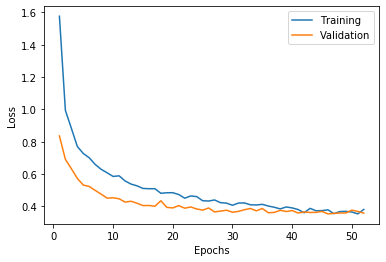

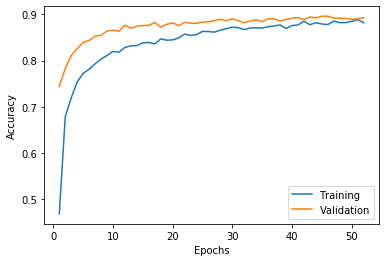

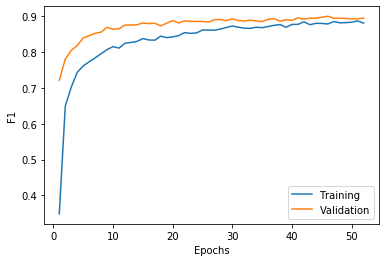

In [30]:
x_plot = list(range(1,history.epoch[-1]+2))

def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(x_plot, network_history.history['loss'])
    plt.plot(x_plot, network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])
    
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(x_plot, network_history.history['acc'])
    plt.plot(x_plot, network_history.history['val_acc'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('F1')
    plt.plot(x_plot, network_history.history['f1_m'])
    plt.plot(x_plot, network_history.history['val_f1_m'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    
plot_history(history)

Valutazione delle metriche sul Test Set

In [31]:
test_loss, test_acc, F1 = model.evaluate(X_test, y_test, batch_size=64)
print("TEST LOSS:", test_loss)
print("TEST ACCURACY:", test_acc)
print("TEST F1:", F1)

2800/2800 [==============================] - 0s 42us/step
TEST LOSS: 0.3222558397906167
TEST ACCURACY: 0.9078571428571428
TEST F1: 0.9111015261922564


Si effettua una previsione dei valori di X_test per poterli inserire nel file di consegna

In [0]:
previsioni = model.predict_classes(X_test)

In [0]:
previsioni = previsioni + 16

In [0]:
y_test = np.argmax(y_test, axis = 1)

In [35]:
previsioni

array([24, 22, 21, ..., 20, 20, 16])

In [0]:
y_test = y_test + 16

In [37]:
y_test

array([24, 22, 21, ..., 20, 20, 16])

Valutazione delle metriche pesate:

In [38]:
print(classification_report(previsioni, y_test))

              precision    recall  f1-score   support

          16       0.92      0.93      0.93       256
          17       0.88      0.92      0.90       259
          18       0.89      0.91      0.90       279
          19       0.95      0.98      0.96       276
          20       0.91      0.92      0.91       261
          21       0.95      0.87      0.91       280
          22       0.86      0.87      0.86       220
          23       0.93      0.93      0.93       258
          24       0.91      0.91      0.91       252
          25       0.91      0.84      0.87       285
          26       0.89      0.92      0.91       174

    accuracy                           0.91      2800
   macro avg       0.91      0.91      0.91      2800
weighted avg       0.91      0.91      0.91      2800



Trasformo y_test per riportarlo al valore one-hot per una futura classificazione (Autoencoder + NN)

In [0]:
y_test = y_test - 16
y_test = to_categorical(y_test)

## Previsioni sul Test Set (x_test) e scrittura dei risultati su file

In [0]:
results = model.predict_classes(x_test)

In [41]:
results = results + 16
results

array([22, 26, 25, ..., 22, 23, 20])

In [42]:
results = results.tolist()
results[0:10]

[22, 26, 25, 19, 25, 17, 21, 16, 19, 22]

Scrivo il risultato su file

In [0]:
risultati = []
for i in results:
    risultati.append(i)
with open("Paolo_Mariani_800307_score2.txt", "w") as f:
    for i in risultati:
        f.write("%s\n" % str(i))

In [44]:
a = pd.read_csv("Paolo_Mariani_800307_score2.txt", header=None)
a.head()

,0
0,22
1,26
2,25
3,19
4,25


# Parte Due: Autoencoder

Normalizzazione valori dei pixel

In [0]:
x_train = x_train/255
x_test = x_test/255

Trasformazione in vettore delle immagini

In [0]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test= x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

## Modello

In [0]:
input_img = Input(shape=(784,))
encoded1 = Dense(392, activation='relu')(input_img)
encoded2 = Dense(196, activation='relu')(encoded1)
encoded3 = Dense(98, activation='relu')(encoded2)
encoded4 = Dense(49, activation='relu')(encoded3)

decoded1 = Dense(98, activation='relu')(encoded4)
decoded2 = Dense(196, activation='relu')(decoded1)
decoded3 = Dense(392, activation='relu')(decoded2)
decoded4 = Dense(784, activation='sigmoid')(decoded3)

### Autoencoder
(Completo)

In [0]:
autoencoder = Model(input_img, decoded4)
autoencoder.compile(optimizer='adam', loss='MSE')

### Encoder 
(Parziale solo di codifica)

In [0]:
encoder = Model(input_img, encoded4)

### Decoder
(Parziale solo di decodifica)

In [0]:
encoding_dim = 49
encoded_input = Input(shape=(encoding_dim,))
dec = autoencoder.layers[-4](encoded_input)
dec = autoencoder.layers[-3](dec)
dec = autoencoder.layers[-2](dec)
dec = autoencoder.layers[-1](dec)
decoder = Model(encoded_input, dec)

## Autoencoder Fit

In [51]:
autoencoder.fit(X_train, X_train,
                epochs=20,
                batch_size=64,
                shuffle=True,
                validation_data = (X_test, X_test))

Train on 11199 samples, validate on 2800 samples
Epoch 1/20
11199/11199 [==============================] - 2s 223us/step - loss: 0.0754 - val_loss: 0.0505
Epoch 2/20
11199/11199 [==============================] - 2s 170us/step - loss: 0.0395 - val_loss: 0.0337
Epoch 3/20
11199/11199 [==============================] - 2s 172us/step - loss: 0.0290 - val_loss: 0.0265
Epoch 4/20
11199/11199 [==============================] - 2s 173us/step - loss: 0.0239 - val_loss: 0.0227
Epoch 5/20
11199/11199 [==============================] - 2s 169us/step - loss: 0.0210 - val_loss: 0.0214
Epoch 6/20
11199/11199 [==============================] - 2s 172us/step - loss: 0.0189 - val_loss: 0.0190
Epoch 7/20
11199/11199 [==============================] - 2s 171us/step - loss: 0.0174 - val_loss: 0.0186
Epoch 8/20
11199/11199 [==============================] - 2s 170us/step - loss: 0.0163 - val_loss: 0.0170
Epoch 9/20
11199/11199 [==============================] - 2s 172us/step - loss: 0.0155 - val_loss: 0.01

In [52]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 392)               307720    
_________________________________________________________________
dense_6 (Dense)              (None, 196)               77028     
_________________________________________________________________
dense_7 (Dense)              (None, 98)                19306     
_________________________________________________________________
dense_8 (Dense)              (None, 49)                4851      
_________________________________________________________________
dense_9 (Dense)              (None, 98)                4900      
_________________________________________________________________
dense_10 (Dense)             (None, 196)               1940

## Visualizzazione del risultato della decodifica con Autoencoder

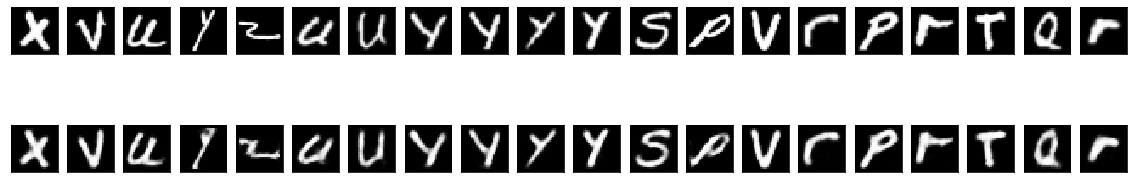

In [53]:
decoded_imgs = autoencoder.predict(X_test, batch_size=64)

n = 20
plt.figure(figsize=(20, 4))
for i in range(n):
    # original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Encoder fit

In [0]:
encoder.compile(optimizer='adam', loss='MSE')

In [55]:
encoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 392)               307720    
_________________________________________________________________
dense_6 (Dense)              (None, 196)               77028     
_________________________________________________________________
dense_7 (Dense)              (None, 98)                19306     
_________________________________________________________________
dense_8 (Dense)              (None, 49)                4851      
Total params: 408,905
Trainable params: 408,905
Non-trainable params: 0
_________________________________________________________________


In [0]:
codifica_train = encoder.predict(X_train)

# Parte Tre: classificazione con Rete Neurale su input codificato (generato dall'Encoder)

Sfrutto la codifica generata al punto precedente e presentata con le immagini che seguono:

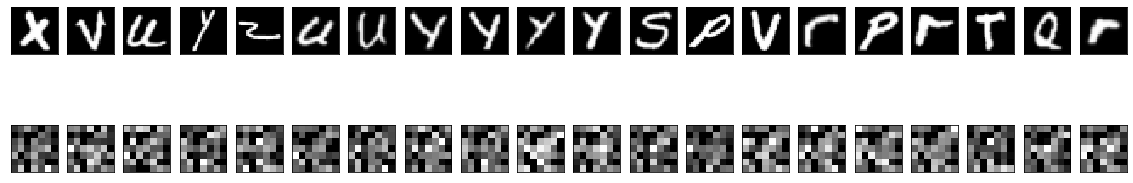

In [57]:
n = 20
plt.figure(figsize=(20, 4))
for i in range(n):
    # original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(codifica_train[i].reshape(7, 7))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Replico la Rete Neurale già implementata fornendo in input una dimensione diversa (49 pixel)

In [0]:
ncol = codifica_train.shape[1]

In [0]:
classitarget = 11

model = Sequential()
model.add(Dense(128, input_shape=(ncol,)))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(classitarget, activation='softmax'))

In [60]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 128)               6400      
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 11)               

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', f1_m])

In [62]:
history = model.fit(codifica_train, y_train, epochs=100, validation_split = 0.25, batch_size=64, verbose=True, callbacks=[stop])

Train on 8399 samples, validate on 2800 samples
Epoch 1/100
8399/8399 [==============================] - 1s 172us/step - loss: 2.5959 - acc: 0.1795 - f1_m: 0.0466 - val_loss: 1.7892 - val_acc: 0.4629 - val_f1_m: 0.0447
Epoch 2/100
8399/8399 [==============================] - 1s 107us/step - loss: 1.6775 - acc: 0.4258 - f1_m: 0.3207 - val_loss: 0.9861 - val_acc: 0.7100 - val_f1_m: 0.6117
Epoch 3/100
8399/8399 [==============================] - 1s 105us/step - loss: 1.2705 - acc: 0.5808 - f1_m: 0.5359 - val_loss: 0.7759 - val_acc: 0.7689 - val_f1_m: 0.7333
Epoch 4/100
8399/8399 [==============================] - 1s 102us/step - loss: 1.0888 - acc: 0.6360 - f1_m: 0.6139 - val_loss: 0.6751 - val_acc: 0.7975 - val_f1_m: 0.7795
Epoch 5/100
8399/8399 [==============================] - 1s 104us/step - loss: 0.9879 - acc: 0.6700 - f1_m: 0.6536 - val_loss: 0.6156 - val_acc: 0.8096 - val_f1_m: 0.7980
Epoch 6/100
8399/8399 [==============================] - 1s 106us/step - loss: 0.9367 - acc: 0.68

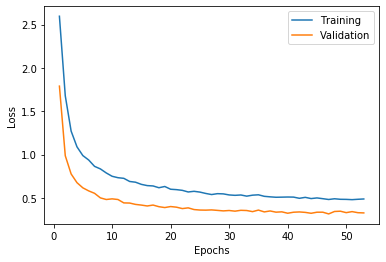

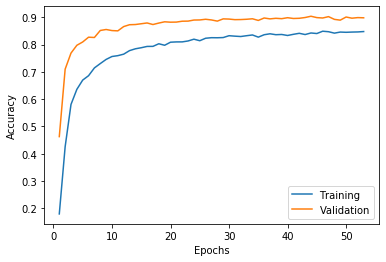

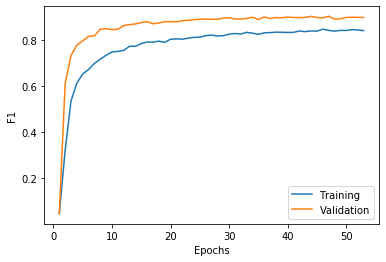

In [63]:
x_plot = list(range(1,history.epoch[-1]+2))

def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(x_plot, network_history.history['loss'])
    plt.plot(x_plot, network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])
    
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(x_plot, network_history.history['acc'])
    plt.plot(x_plot, network_history.history['val_acc'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('F1')
    plt.plot(x_plot, network_history.history['f1_m'])
    plt.plot(x_plot, network_history.history['val_f1_m'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    
plot_history(history)

Si effettua la codifica del rimanente 20% dei dati

In [0]:
codifica_test = encoder.predict(X_test)

Il risultato del modello è presentato tramite le seguenti metirche:

In [65]:
test_loss, test_acc, F1 = model.evaluate(codifica_test, y_test, batch_size=64)
print("TEST LOSS:", test_loss)
print("TEST ACCURACY:", test_acc)
print("TEST F1:", F1)

2800/2800 [==============================] - 0s 31us/step
TEST LOSS: 0.31418820704732625
TEST ACCURACY: 0.9071428574834551
TEST F1: 0.9067240398270743


## Test del modello "misto"



In [0]:
previsioni = model.predict_classes(codifica_test)

In [67]:
previsioni = previsioni + 16
previsioni

array([24, 22, 21, ..., 20, 20, 16])

In [68]:
y_test = np.argmax(y_test, axis=1)
y_test = y_test + 16
y_test

array([24, 22, 21, ..., 20, 20, 16])

In [69]:
print(classification_report(previsioni, y_test))

              precision    recall  f1-score   support

          16       0.94      0.94      0.94       259
          17       0.86      0.94      0.90       246
          18       0.91      0.88      0.89       295
          19       0.96      0.95      0.95       290
          20       0.91      0.91      0.91       263
          21       0.91      0.90      0.91       262
          22       0.85      0.88      0.86       216
          23       0.94      0.85      0.89       285
          24       0.91      0.92      0.92       249
          25       0.86      0.90      0.88       250
          26       0.93      0.90      0.92       185

    accuracy                           0.91      2800
   macro avg       0.91      0.91      0.91      2800
weighted avg       0.91      0.91      0.91      2800

